# New plotting functions and capabilities

Latest 0.7.0 and 0.7.1 releases of Nilearn come with a bunch of new plotting functions and capabilities.

## Outline

- **Carpet Plots**
    - <a href='#carpet'>Description</a>
    - <a href='#carpet-example1'>Basic usage</a>
    - <a href='#carpet-example2'>Support for discrete atlases</a>
- **Plot markers**
    - <a href='#markers'>Description</a>
    - <a href='#markers-example'>Example</a>
- **Plot Surf Contours**
    - <a href='#surf-contours'>Description</a>
    - <a href='#surf-contours-example'>Example</a>
- **Plot Event**
    - <a href='#plot-event'>Description</a>
    - <a href='#plot-event-example'>Example</a>
- <a href="#mosaic">Mosaic plotting mode</a>

<span id="carpet"></span>

## Carpet Plots

A common quality control step for functional MRI data is to visualize the data over time in a *carpet plot*, also knwon as "Power plots" or "grayplots". 

This plotting capability is accessible through the function `plot_carpet` of the `plotting` module.

First of all, make sure you have nilearn >= 0.7.0:

In [1]:
import nilearn
print(nilearn.__version__)

0.7.2.dev


In [2]:
from nilearn.plotting import plot_carpet

/home/nicolas/GitRepos/nilearn-fork/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


The documentation for this function can be seen on the website [here](http://nilearn.github.io/modules/generated/nilearn.plotting.plot_carpet.html#nilearn.plotting.plot_carpet), or thanks to Jupyter magic command:

In [3]:
?plot_carpet

Signature:
plot_carpet(
    img,
    mask_img=None,
    mask_labels=None,
    detrend=True,
    output_file=None,
    figure=None,
    axes=None,
    vmin=None,
    vmax=None,
    title=None,
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f3c8968bcd0>,
)
Docstring:
Plot an image representation of voxel intensities across time.

This figure is also known as a "grayplot" or "Power plot".

Parameters
----------
img : Niimg-like object
    4D image.
    See http://nilearn.github.io/manipulating_images/input_output.html.

mask_img : Niimg-like object or None, optional
    Limit plotted voxels to those inside the provided mask (default is
    None). If a 3D atlas is provided, voxels will be grouped by atlas
    value and a colorbar will be added to the left side of the figure
    with atlas labels.
    If not specified, a new mask will be derived from data.
    See http://nilearn.github.io/manipulating_images/input_output.html.

mask_labels : :obj:`dict`, optional
    If ``

<span id="carpet-example1"></span>

### Example

In order to use it, we need to grab some fmri data using a fetcher function from the `datasets` module:

In [4]:
from nilearn.datasets import fetch_adhd
adhd = fetch_adhd(n_subjects=1)
adhd.func

/home/nicolas/GitRepos/nilearn-fork/nilearn/datasets/func.py:458: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


['/home/nicolas/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz']

We need to compute a mask to only plot information relative to voxels within the brain. Since we have no anatomical data, we build an EPI-based mask here:

In [5]:
from nilearn.masking import compute_epi_mask
mask = compute_epi_mask(adhd.func[0])

Finally, we can call `plot_carpet` with the computed mask:

<ipython-input-6-93e753ca298e>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


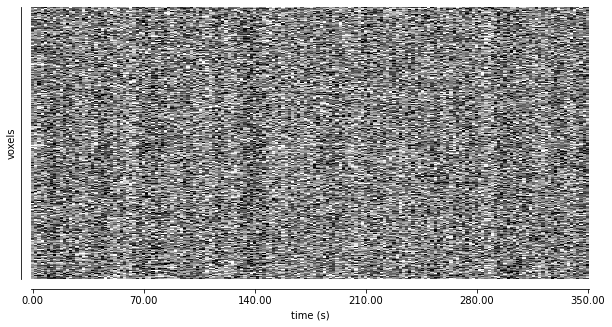

In [6]:
display = plot_carpet(adhd.func[0], mask)
display.show()

<span id="carpet-example2"></span>

### Support for discrete atlases

In 0.7.1 `plot_carpet` supports discrete atlases: when an atlas is used, a colorbar is added to the figure, optionally with labels corresponding to the different values in the atlas.

#### Example

Create a gray matter/white matter/cerebrospinal fluid mask from ICBM152 tissue probability maps:

In [7]:
import nibabel as nib
import numpy as np
from nilearn.image import concat_imgs
from nilearn.datasets import fetch_icbm152_2009

atlas = fetch_icbm152_2009()
atlas_img = concat_imgs((atlas["gm"], 
                         atlas["wm"], 
                         atlas["csf"]))
# Define the labels we are going to use
map_labels = {"Gray Matter": 1, 
              "White Matter": 2, 
              "Cerebrospinal Fluid": 3}
# Get the data
atlas_data = atlas_img.get_fdata()
atlas_data.shape

(197, 233, 189, 3)

We take the argmax along the last dimension to build a discrete atlas:

In [8]:
discrete_version = np.argmax(atlas_data, axis=3) + 1
discrete_version[np.max(atlas_data, axis=3) == 0] = 0 # 0 is the background label
# Finally we build a NiftiImage from this:
discrete_atlas_img = nib.Nifti1Image(
    discrete_version,
    atlas_img.affine,
    atlas_img.header)

We can now make our carpet plot and provide this discrete atlas:

/home/nicolas/GitRepos/nilearn-fork/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Coercing atlas_values to <class 'int'>


<ipython-input-9-c57e24b77964>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


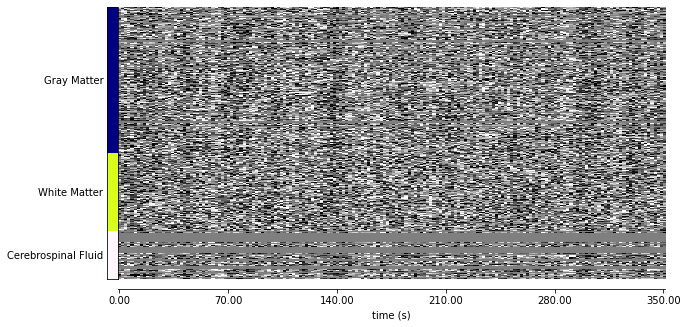

In [9]:
display = plot_carpet(adhd.func[0],
                      discrete_atlas_img,
                      mask_labels=map_labels)
display.show()

<span id="markers"></span>

## Plot markers

`plot_markers` shows network nodes (markers) on a glass brain template and color code them according to provided nodal measure (i.e. connection strength). 

<div class="alert alert-block alert-danger">
<b>Deprecation:</b> This function will replace plot_connectome_strength in release 0.9.
</div>

Documentation is available on the website [here](http://nilearn.github.io/modules/generated/nilearn.plotting.plot_markers.html#nilearn.plotting.plot_markers), or with Jupyter magic:

In [10]:
from nilearn.plotting import plot_markers
?plot_markers

Signature:
plot_markers(
    node_values,
    node_coords,
    node_size='auto',
    node_cmap=<matplotlib.colors.ListedColormap object at 0x7f3c8962b340>,
    node_vmin=None,
    node_vmax=None,
    node_threshold=None,
    alpha=0.7,
    output_file=None,
    display_mode='ortho',
    figure=None,
    axes=None,
    title=None,
    annotate=True,
    black_bg=False,
    node_kwargs=None,
    colorbar=True,
)
Docstring:
Plot network nodes (markers) on top of the brain glass schematics.

Nodes are color coded according to provided nodal measure. Nodal measure
usually represents some notion of node importance.

Parameters
----------
node_values : array_like of length n
    Vector containing nodal importance measure. Each node will be colored
    acording to corresponding node value.

node_coords : numpy array_like of shape (n, 3)
    3d coordinates of the graph nodes in world space.

node_size : 'auto' or scalar or array-like, optional
    Size(s) of the nodes in points^2. By default th

<span id="markers-example"></span>

### Example

In [11]:
from nilearn.datasets import fetch_atlas_yeo_2011, fetch_development_fmri

atlas  = fetch_atlas_yeo_2011() # Load atlas
data   = fetch_development_fmri(n_subjects=10) # Load fmri data with 10 subjects

Compute the timeseries using the `NiftiLabelsMasker`:

In [12]:
from nilearn.input_data import NiftiLabelsMasker

# create masker to extract functional data within atlas parcels
masker = NiftiLabelsMasker(labels_img=atlas.thick_17,
                           standardize=True)

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

time_series = np.array(time_series)
time_series.shape

(10, 168, 17)

Compute the connectivity using the `ConnectivityMeasure` object from the `connectome` module:

In [13]:
from nilearn.connectome import ConnectivityMeasure

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')

# compute correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)
correlation_matrices.shape

(10, 17, 17)

We get one correlation matrix per subject. In order to visualize the connectome, we take take the mean accross subjects:

In [14]:
# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_
mean_correlation_matrix.shape

(17, 17)

In order to use `plot_markers` to visualize the connectome, we need to provide:

- `node_strength`: a vector of connection strength for each node
- `coordinates`: a vector of node coordinates

In [15]:
from nilearn.plotting import find_parcellation_cut_coords

# Here, we grab the center coordinates for atlas labels
coordinates = find_parcellation_cut_coords(labels_img=atlas.thick_17)

# and we compute normalized, absolute strength for each node
node_strength = np.sum(np.abs(mean_correlation_matrix), axis=0)
node_strength /= np.max(node_strength)

We are now ready to visualize the connectome with `plot_markers`:

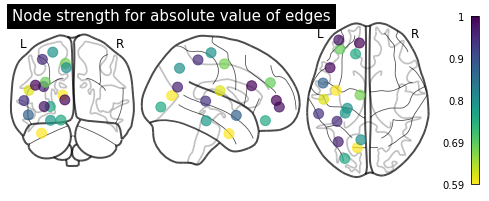

In [16]:
plot_markers(node_strength,
             coordinates,
             title='Node strength for absolute value of edges')

A more complete example is available on the website [here](http://nilearn.github.io/auto_examples/03_connectivity/plot_sphere_based_connectome.html#sphx-glr-auto-examples-03-connectivity-plot-sphere-based-connectome-py).

<span id="surf-contours"></span>

## Plot Surf Contours

The function `plot_surf_contours` plots contours of ROIs on a surface, optionally over a statistical map. The documentation is available on the website [here](http://nilearn.github.io/modules/generated/nilearn.plotting.plot_surf_contours.html#nilearn.plotting.plot_surf_contours), or through the Jupyter magic command:

In [17]:
from nilearn.plotting import plot_surf_contours
?plot_surf_contours

Signature:
plot_surf_contours(
    surf_mesh,
    roi_map,
    axes=None,
    figure=None,
    levels=None,
    labels=None,
    colors=None,
    legend=False,
    cmap='tab20',
    title=None,
    output_file=None,
    **kwargs,
)
Docstring:
Plotting contours of ROIs on a surface, optionally over a statistical map.

Parameters
----------
surf_mesh : str or list of two numpy.ndarray
    Surface mesh geometry, can be a file (valid formats are
    .gii or Freesurfer specific files such as .orig, .pial,
    .sphere, .white, .inflated) or
    a list of two Numpy arrays, the first containing the x-y-z coordinates
    of the mesh vertices, the second containing the indices
    (into coords) of the mesh faces.

roi_map : str or numpy.ndarray or list of numpy.ndarray
    ROI map to be displayed on the surface mesh, can be a file
    (valid formats are .gii, .mgz, .nii, .nii.gz, or Freesurfer specific
    files such as .annot or .label), or
    a Numpy array with a value for each vertex of the 

<span id="surf-contours-example"></span>

### Example

We show here how to plot contours for ROI on the surface with and without a statistical map.

In [18]:
from nilearn.datasets import fetch_neurovault_motor_task, fetch_surf_fsaverage

# Get a statisical map
motor_images = fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

# Get a cortical mesh
fsaverage = fetch_surf_fsaverage()

In [19]:
from nilearn.surface import vol_to_surf

# Sample the 3D data around each node of the mesh
texture = vol_to_surf(stat_img, 
                      fsaverage.pial_right)

Use an atlas and choose regions to outline:

In [20]:
from nilearn.datasets import fetch_atlas_surf_destrieux

destrieux_atlas = fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas['map_right']

In [21]:
# these are the regions we want to outline
# Feel free to change these!
regions_dict = {b'G_postcentral': 'Postcentral gyrus',
                b'G_precentral': 'Precentral gyrus',
                b'G_pariet_inf-Angular': 'Parietal inf'}

# get indices in atlas for these labels
regions_indices = [np.where(np.array(destrieux_atlas['labels']) == region)[0][0]
                   for region in regions_dict]

labels = list(regions_dict.values())

We can use `plot_surf_contours` without a statistical map:

<ipython-input-22-7839350792ef>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


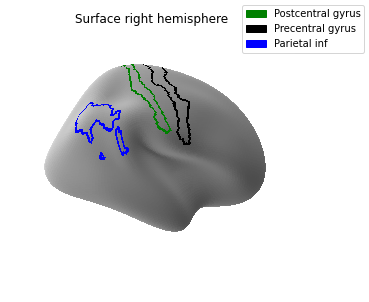

In [22]:
display = plot_surf_contours(fsaverage.infl_right, parcellation, labels=labels,
                             title='Surface right hemisphere',
                             levels=regions_indices, legend=True,
                             colors=['g', 'k', 'b'], hemi='right')
display.show()

We can use `plot_surf_contours` with `plot_surf_stat_map` in order to plot the contours on the surface over the stat map:

<ipython-input-23-01014a1bbe97>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  display.show()


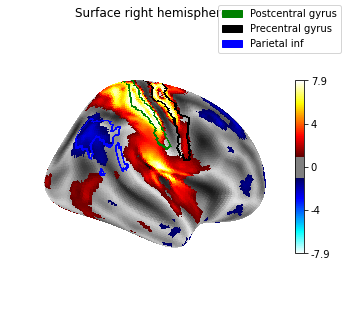

In [23]:
from nilearn.plotting import plot_surf_stat_map
figure = plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere',
                            colorbar=True, threshold=1.,
                            bg_map=fsaverage.sulc_right)

display = plot_surf_contours(fsaverage.infl_right, parcellation, labels=labels,
                             levels=regions_indices, figure=figure, legend=True,
                             colors=['g', 'k', 'b'])
display.show()

<span id="plot-event"></span>

## Plot event

This function enables event visualization. The documentation is available on the website [here](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_event.html#nilearn.plotting.plot_event), or through the Jupyter magic command:

In [24]:
from nilearn.plotting import plot_event
?plot_event

Signature: plot_event(model_event, cmap=None, output_file=None, **fig_kwargs)
Docstring:
Creates plot for event visualization.

Parameters
----------
model_event : pandas DataFrame or list of pandas DataFrame
    The `pandas.DataFrame` must have three columns
    ``event_type`` with event name, ``onset`` and ``duration``.
    The `pandas.DataFrame` can also be obtained from
    :func:`nilearn.glm.first_level.first_level_from_bids`.

cmap : str or matplotlib.cmap, optional
    The colormap used to label different events.

output_file : string or None, optional
    The name of an image file to export the plot to. Valid extensions
    are .png, .pdf, .svg. If output_file is not None, the plot
    is saved to a file, and the display is closed.

**fig_kwargs : extra keyword arguments, optional
    Extra arguments passed to matplotlib.pyplot.subplots.

Returns
-------
Plot Figure object
File:      ~/GitRepos/nilearn-fork/nilearn/plotting/matrix_plotting.py
Type:      function


<span id="plot-event-example"></span>

### Example

In this example, we build a dummy paradigm and use `plot_event` to visualize it:

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

conditions = ['c0', 'c0', 'c0', 'c1', 'c1', 'c1', 'c2', 'c2', 'c2'] 
onsets = [30, 70, 100, 10, 30, 90, 30, 40, 60] 
durations = 1 * np.ones(9) 
events = 2 * [pd.DataFrame({'trial_type': conditions, 
                            'onset': onsets, 
                            'duration': durations})]
events

[  trial_type  onset  duration
 0         c0     30       1.0
 1         c0     70       1.0
 2         c0    100       1.0
 3         c1     10       1.0
 4         c1     30       1.0
 5         c1     90       1.0
 6         c2     30       1.0
 7         c2     40       1.0
 8         c2     60       1.0,
   trial_type  onset  duration
 0         c0     30       1.0
 1         c0     70       1.0
 2         c0    100       1.0
 3         c1     10       1.0
 4         c1     30       1.0
 5         c1     90       1.0
 6         c2     30       1.0
 7         c2     40       1.0
 8         c2     60       1.0]

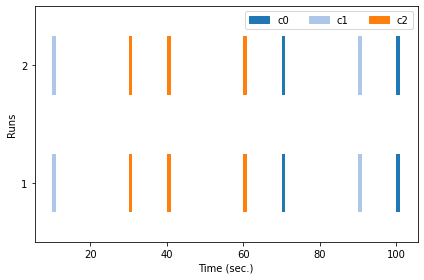

In [26]:
plot_event(events)
plt.show()

<span id="mosaic"></span>

## Mosaic Mode

The functions `plot_epi`, `plot_roi`, `plot_stat_map`, and `plot_prob_atlas` are since the 0.7.1 release implemented with new display mode Mosaic. 

That implies plotting 3D maps in multiple columns and rows in a single axes.

In [27]:
# Get some data to use with plot_stat_map...
from nilearn.datasets import fetch_neurovault_motor_task

motor_images = fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

By default, the mosaic mode will display the same number of cuts along all axes:

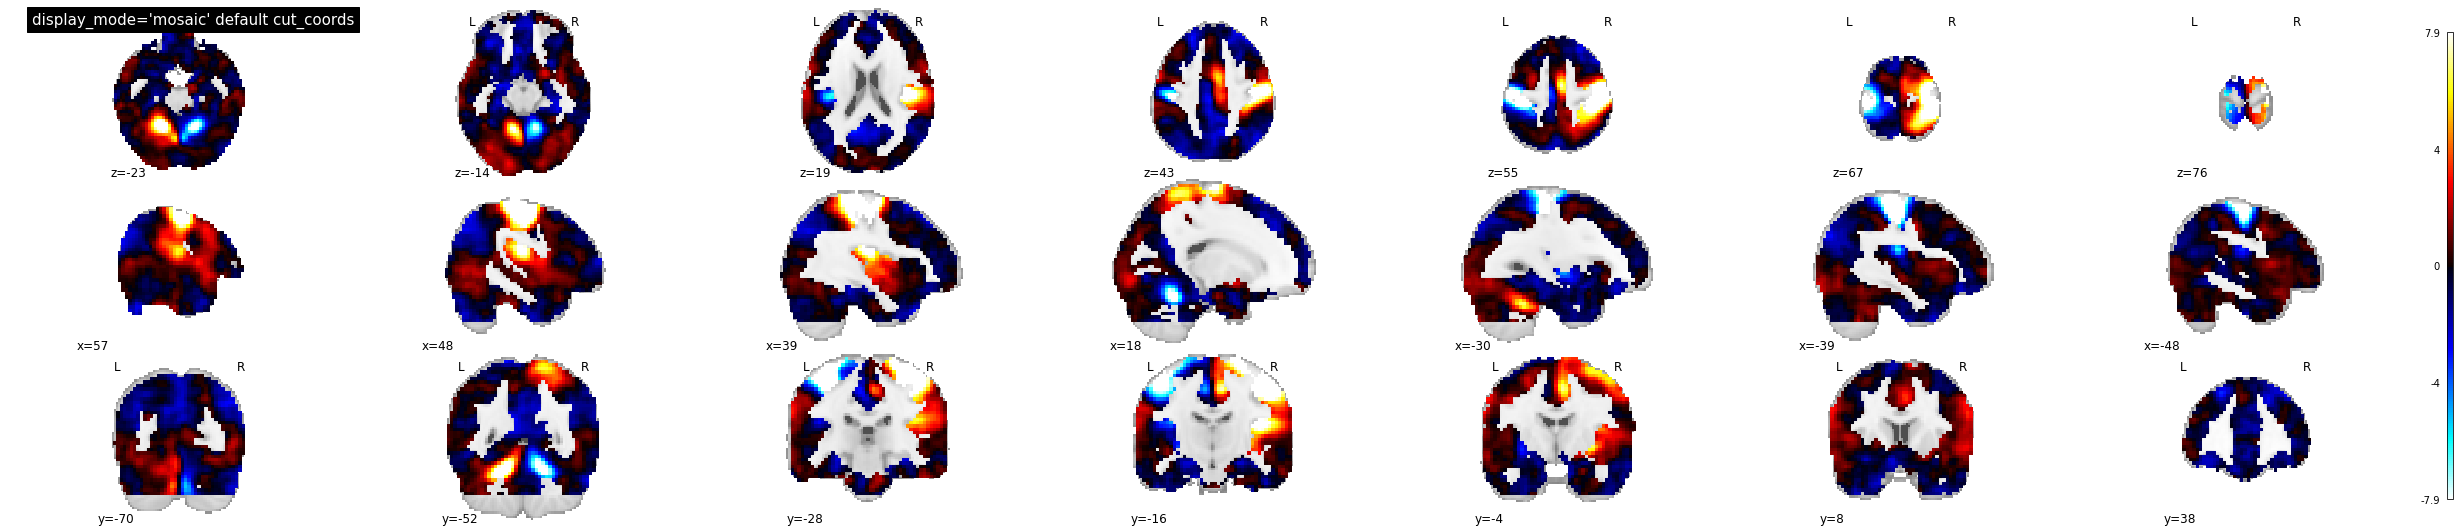

In [28]:
from nilearn.plotting import plot_stat_map

plot_stat_map(stat_img, 
              display_mode='mosaic',
              title="display_mode='mosaic' default cut_coords")

If we want to use the same number of cuts for all axes, we can use a simple integer value for `cut_coords`:

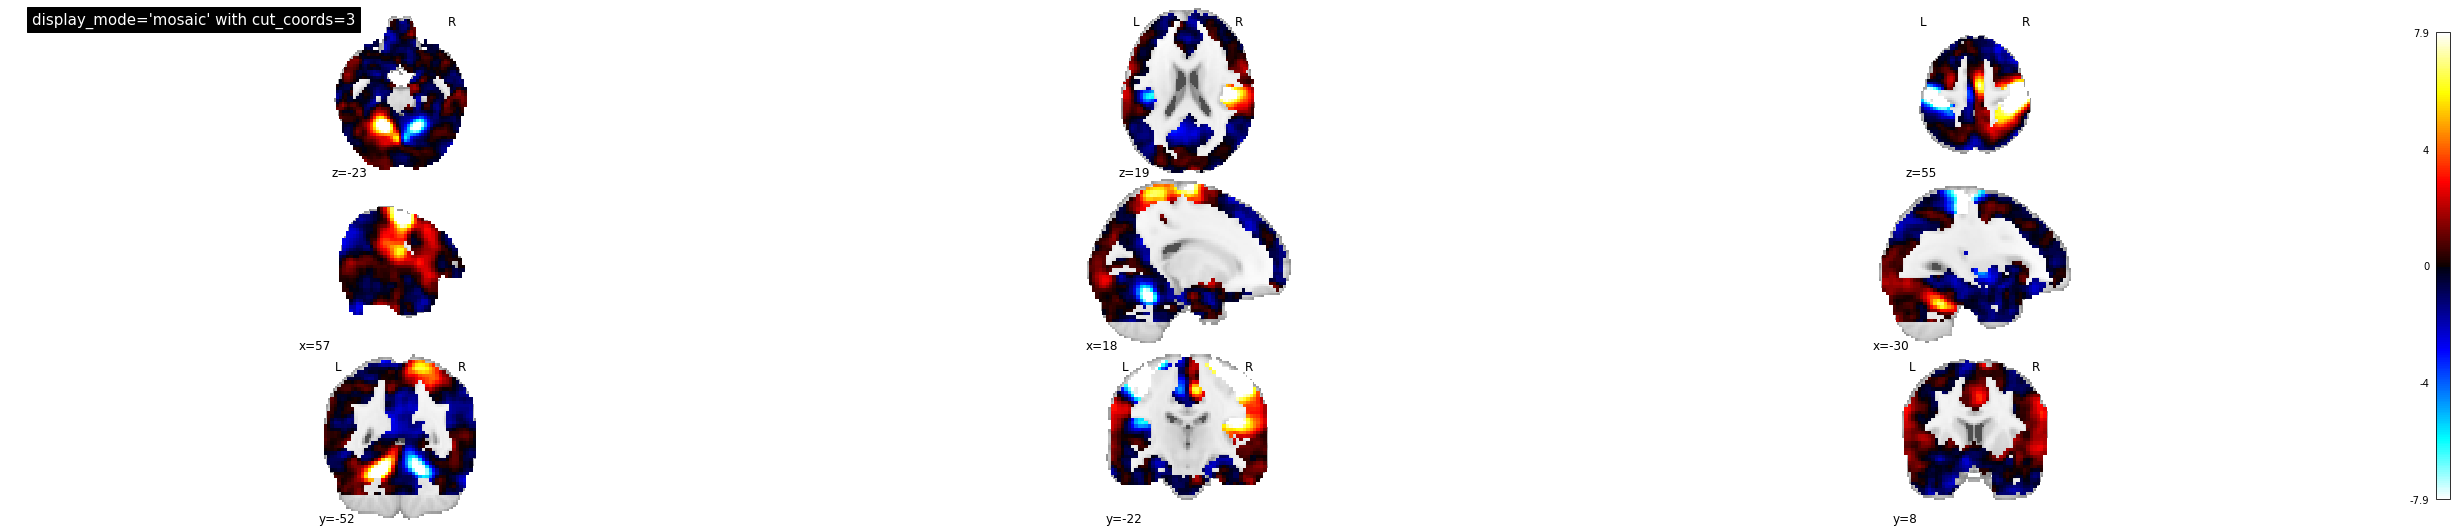

In [29]:
plot_stat_map(stat_img, 
              display_mode='mosaic',
              cut_coords=3, # Here we specify an integer for cut_coords
              title="display_mode='mosaic' with cut_coords=3")

Finally, if we want different numbers of cuts, we can use a length 3 tuple value for `cut_coords`:

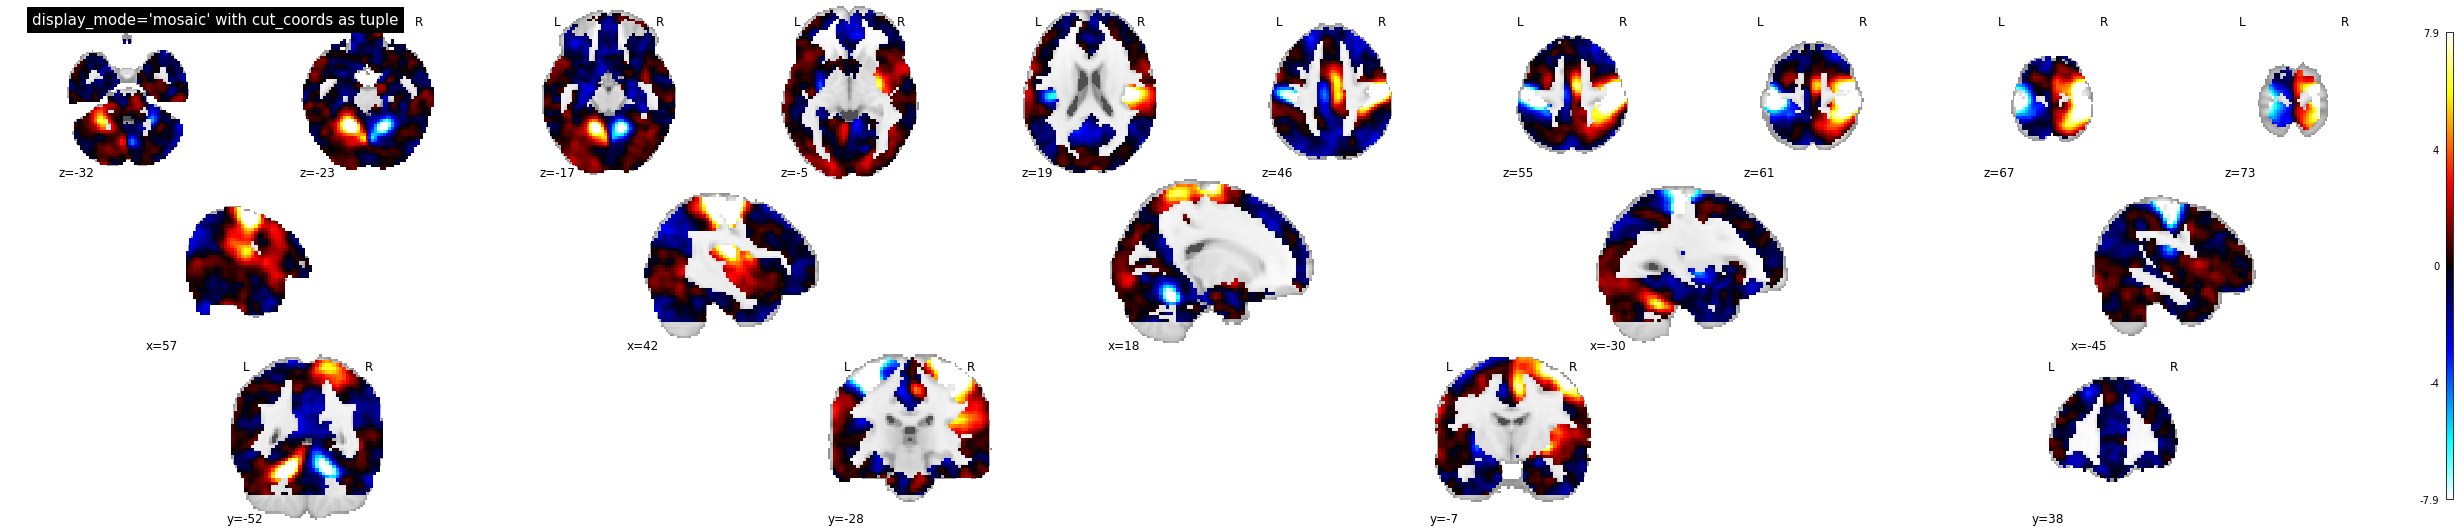

In [30]:
plot_stat_map(stat_img, 
              display_mode='mosaic',
              cut_coords=(5, 4, 10), # Here we specify cut_coords as a tuple
              title="display_mode='mosaic' with cut_coords as tuple")

Use the mosaic mode with another function:

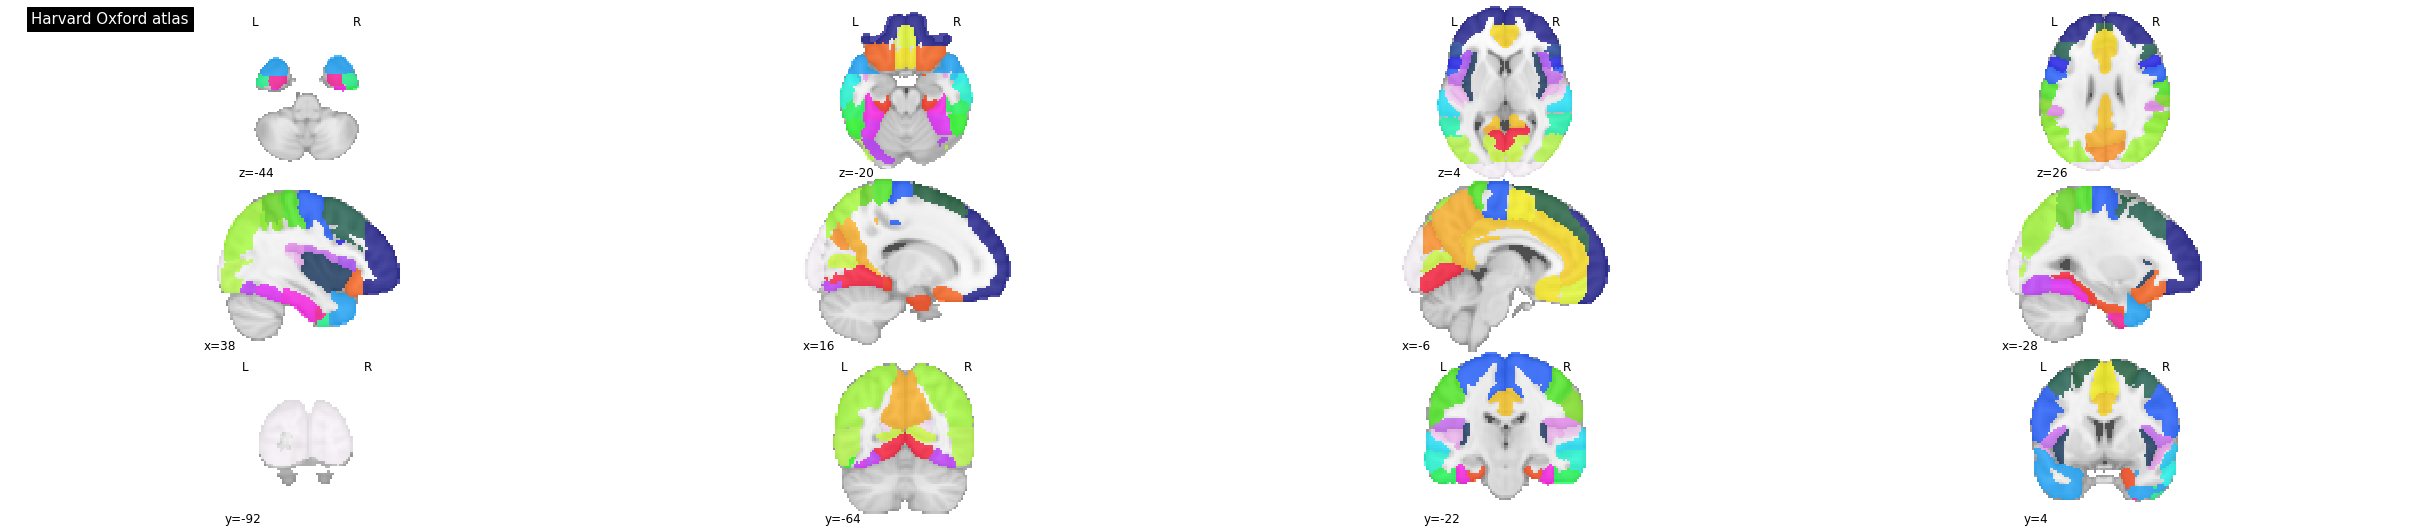

In [31]:
from nilearn.datasets import fetch_atlas_harvard_oxford
from nilearn.plotting import plot_roi

atlas = fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
maps = atlas.maps
plot_roi(maps,
         display_mode='mosaic',
         cut_coords=4,
         title="Harvard Oxford atlas")